In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv('sample.csv')
#x_train,x_test,y_train,y_test = 

In [46]:
df.head()

,Unnamed: 0,first,second,target
0,0,-1.159883,0.238372,0
1,1,-2.188338,-0.834214,0
2,2,-1.660250,-1.176996,0
3,3,-1.742980,-1.025460,0
4,4,-1.683043,-1.005869,0


In [47]:
df = df.drop(columns=['Unnamed: 0'])
target = df.pop('target')

In [48]:
df.head()

,first,second
0,-1.159883,0.238372
1,-2.188338,-0.834214
2,-1.660250,-1.176996
3,-1.742980,-1.025460
4,-1.683043,-1.005869


<AxesSubplot:ylabel='Frequency'>

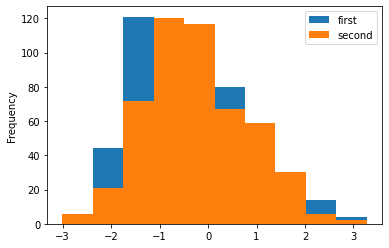

In [72]:
df.plot.hist()

<AxesSubplot:xlabel='first', ylabel='second'>

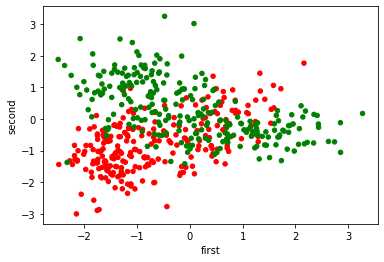

In [105]:
color= ['red' if t == 0 else 'green' for t in target]
df.plot.scatter('first','second',c=color)

**LDA**

In [49]:
#Get the classes
classes = target.unique()
classes

array([0, 1])

In [50]:
#Class priors estimation
prior0 = df[target==0].shape[0]/df.shape[0]
prior1 = df[target==1].shape[0]/df.shape[0]

In [51]:
prior0

0.5

In [52]:
#Class means estimation
mean0 = df[target==0].mean()
mean1 = df[target==1].mean()
mean0

first    -0.674116
second   -0.779524
dtype: float64

In [53]:
#Covariance estimation, assuming the both classes have the same cov matrix
cov = df.cov()

In [54]:
cov

,first,second
first,1.427681,0.093252
second,0.093252,1.072228


In [79]:
#Class covariance estimations
cov0 = df[target==0].cov()
cov1 = df[target==1].cov()

In [80]:
cov0

,first,second
first,1.073231,0.493751
second,0.493751,0.722541


**LDA**

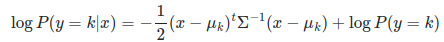

In [95]:
preds = []
for x in df.values:
    a = -0.5 * (x-mean0).T @ np.linalg.inv(cov) @ (x-mean0) - np.log(prior0)
    b = -0.5 * (x-mean1).T @ np.linalg.inv(cov) @ (x-mean1) - np.log(prior1)

    if a > b:
        preds.append(0)
    else:
        preds.append(1)

In [96]:
np.sum(target-preds)

-20

**QDA**

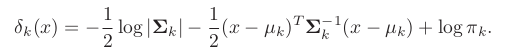


In [103]:
preds = []
for x in df.values:
    
    det0 = np.linalg.det(cov0)
    inv0 = np.linalg.inv(cov0)
    
    det1 = np.linalg.det(cov1)
    inv1 = np.linalg.inv(cov1)
    
    a = -0.5 * np.log(det0) - 0.5* (x-mean0).T @ inv0 @ (x-mean0) + np.log(prior0)
    
    b = -0.5 * np.log(det1) - 0.5* (x-mean1).T @ inv1 @ (x-mean1) + np.log(prior1)

    if a > b:
        preds.append(0)
    else:
        preds.append(1)

In [104]:
np.sum(target-preds)

-24

In [101]:
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [92]:
clf = LinearDiscriminantAnalysis()
clf.fit(df, target)
np.sum(target-clf.predict(df))

-20

In [102]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(df, target)
np.sum(target-clf.predict(df))

-24

**Logistic Regression**

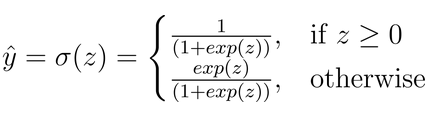

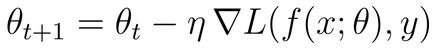

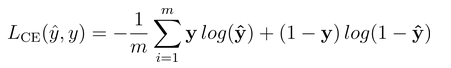

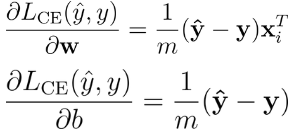

In [106]:
x_train,x_test,y_train,y_test = train_test_split(df,target,random_state=66,test_size=0.33)

In [127]:
y_train = y_train.to_numpy()[:,None]
y_test = y_test.to_numpy()[:,None]

In [108]:
def sgmd(k):
        return 1 / (1 + np.exp(-k))

In [171]:
m,p = x_train.shape

w =np.zeros((p, 1))
bias = 0
lr = 0.1
costs = []

for i in range(100):
    
    y_predict = sgmd( x_train @ w + bias)
    cost = (- 1 / m) * np.sum(y_train * np.log(y_predict) + (1 - y_train) * (np.log(1 - y_predict)))
    costs.append(cost)
    
    dw = (1 / m) * np.dot(x_train.T, (y_predict - y_train))
    db = (1 / m) * np.sum(y_predict - y_train)
    
    w = w - lr*dw
    b = b - lr*db
    

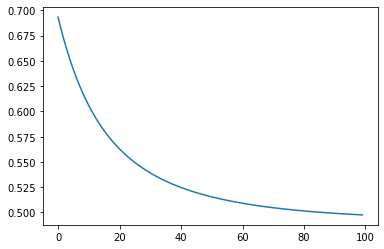

In [172]:
plt.plot(np.arange(100),costs)

In [164]:
y_predict = sgmd(x_test @ w + bias)
y_predict = np.where(y_predict>0.5,1,0)
np.sum(y_predict-y_test)

-26